In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [4]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [6]:
#Convert Subscription_Start_Date and Date_of_Churn data type to date
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   object        
 3   Location                 1000 non-null   object        
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   object        
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   object        
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   object        
 10  Devices_Used             1000 non-null   object        
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

In [8]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN


In [9]:
df.describe(include='all')

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,246,246
unique,NaN,NaN,3,5,NaN,3,NaN,3,NaN,5,4,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,Other,West,NaN,Standard,NaN,Credit Card,NaN,Drama,Mobile,NaN,NaN,NaN,NaN,NaN,Price increase
freq,NaN,NaN,336,216,NaN,530,NaN,613,NaN,212,408,NaN,NaN,NaN,NaN,NaN,68
mean,500.500000,44.385000,NaN,NaN,2021-09-18 17:08:01.662466560,NaN,14.580000,NaN,19.071653,NaN,NaN,1.893771,1049.201000,3.030000,0.246000,2022-02-28 15:27:17.174715904,NaN
min,1.000000,18.000000,NaN,NaN,2019-05-10 01:53:37.659073,NaN,9.990000,NaN,0.041574,NaN,NaN,0.000486,1000.000000,1.000000,0.000000,2019-08-11 01:53:37.658920,NaN
25%,250.750000,31.750000,NaN,NaN,2020-05-15 19:53:37.664891136,NaN,9.990000,NaN,5.490739,NaN,NaN,0.548918,1023.000000,2.000000,0.000000,2020-11-15 07:53:37.659917824,NaN
50%,500.500000,45.000000,NaN,NaN,2021-08-21 01:53:37.662536448,NaN,14.990000,NaN,13.361219,NaN,NaN,1.271808,1048.000000,3.000000,0.000000,2021-11-20 01:53:37.661230336,NaN
75%,750.250000,57.000000,NaN,NaN,2023-01-09 07:53:37.664328192,NaN,14.990000,NaN,26.471636,NaN,NaN,2.623575,1075.000000,4.000000,0.000000,2023-06-05 01:53:37.660055808,NaN
max,1000.000000,70.000000,NaN,NaN,2024-05-06 01:53:37.662112,NaN,19.990000,NaN,139.170408,NaN,NaN,11.417557,1099.000000,5.000000,1.000000,2025-02-09 01:53:37.661719,NaN


<Axes: xlabel='Subscription_Type', ylabel='Monthly_Hours_Watched'>

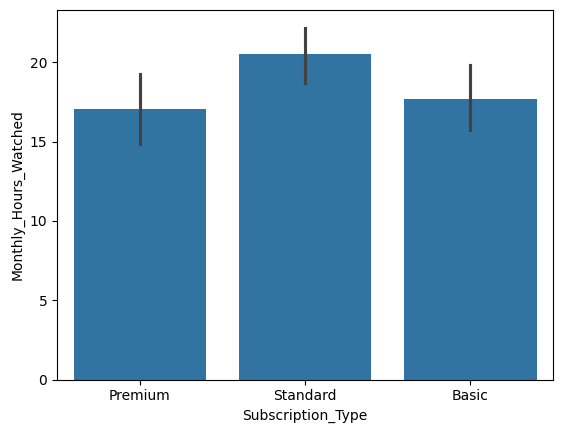

In [10]:
sns.barplot(x='Subscription_Type', y='Monthly_Hours_Watched', data=df)

<Axes: xlabel='Favorite_Genre', ylabel='Average_Session_Length'>

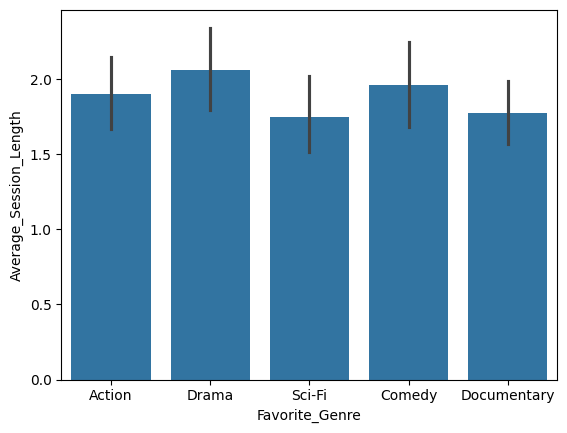

In [11]:
sns.barplot(x='Favorite_Genre', y='Average_Session_Length', data=df)

In [1]:
groupby_mobile = df(groupby_mobile)
sns.scatterplot(x='Devices_Used', y='Average_Session_Length', data=df)

NameError: name 'df' is not defined

In [ ]:
df.groupby('Location')['Average_Session_Length'].mean()

Location
Central    2.057238
East       1.765785
North      1.809283
South      1.890815
West       1.942407
Name: Average_Session_Length, dtype: float64

In [ ]:
df.isnull().sum()/100 

User_ID                    0.00
Age                        0.00
Gender                     0.00
Location                   0.00
Subscription_Start_Date    0.00
Subscription_Type          0.00
Monthly_Payment            0.00
Payment_Method             0.00
Monthly_Hours_Watched      0.00
Favorite_Genre             0.00
Devices_Used               0.00
Average_Session_Length     0.00
Content_ID                 0.00
Rating_Given               0.00
Churned                    0.00
Date_of_Churn              7.54
Reason_for_Churn           7.54
dtype: float64

In [ ]:
df.isnull().sum().sum() / df.drop('User_ID', axis=1).size

0.09425

In [ ]:
df.size

17000

In [ ]:
#Replace missing values with data
df['Date_of_Churn'].fillna('Not Churned')
df['Reason_for_Churn'].fillna('Unknown')

0                   Unknown
1                   Unknown
2                   Unknown
3                   Unknown
4                   Unknown
               ...         
995    Found better service
996                 Unknown
997                 Unknown
998    Found better service
999                 Unknown
Name: Reason_for_Churn, Length: 1000, dtype: object

In [ ]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN


In [ ]:
categorical_cols = ['Gender', 'Location', 'Subscription_Type', 'Payment_Method', 'Favorite_Genre', 'Devices_Used']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   category      
 3   Location                 1000 non-null   category      
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   category      
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   category      
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   category      
 10  Devices_Used             1000 non-null   category      
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

In [ ]:
df.describe(include='all')

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,246,246
unique,NaN,NaN,3,5,NaN,3,NaN,3,NaN,5,4,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,Other,West,NaN,Standard,NaN,Credit Card,NaN,Drama,Mobile,NaN,NaN,NaN,NaN,NaN,Price increase
freq,NaN,NaN,336,216,NaN,530,NaN,613,NaN,212,408,NaN,NaN,NaN,NaN,NaN,68
mean,500.500000,44.385000,NaN,NaN,2021-09-18 17:08:01.662466560,NaN,14.580000,NaN,19.071653,NaN,NaN,1.893771,1049.201000,3.030000,0.246000,2022-02-28 15:27:17.174715904,NaN
min,1.000000,18.000000,NaN,NaN,2019-05-10 01:53:37.659073,NaN,9.990000,NaN,0.041574,NaN,NaN,0.000486,1000.000000,1.000000,0.000000,2019-08-11 01:53:37.658920,NaN
25%,250.750000,31.750000,NaN,NaN,2020-05-15 19:53:37.664891136,NaN,9.990000,NaN,5.490739,NaN,NaN,0.548918,1023.000000,2.000000,0.000000,2020-11-15 07:53:37.659917824,NaN
50%,500.500000,45.000000,NaN,NaN,2021-08-21 01:53:37.662536448,NaN,14.990000,NaN,13.361219,NaN,NaN,1.271808,1048.000000,3.000000,0.000000,2021-11-20 01:53:37.661230336,NaN
75%,750.250000,57.000000,NaN,NaN,2023-01-09 07:53:37.664328192,NaN,14.990000,NaN,26.471636,NaN,NaN,2.623575,1075.000000,4.000000,0.000000,2023-06-05 01:53:37.660055808,NaN
max,1000.000000,70.000000,NaN,NaN,2024-05-06 01:53:37.662112,NaN,19.990000,NaN,139.170408,NaN,NaN,11.417557,1099.000000,5.000000,1.000000,2025-02-09 01:53:37.661719,NaN


<Axes: xlabel='Age'>

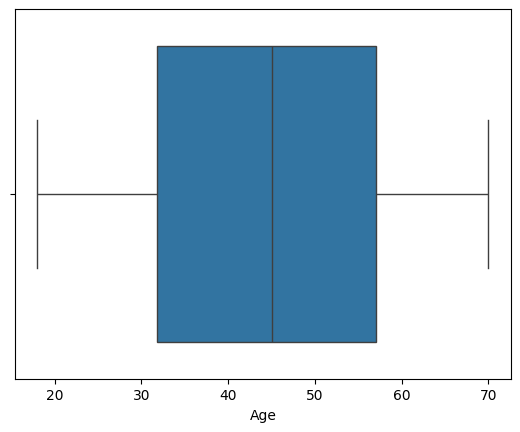

In [ ]:
sns.boxplot(x='Age', data=df)

<Axes: xlabel='Location', ylabel='count'>

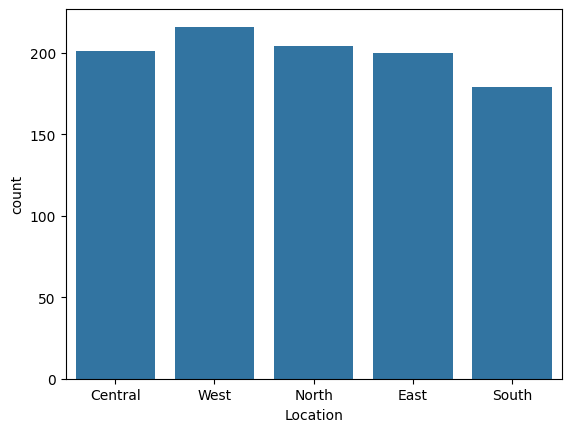

In [ ]:
sns.countplot(x='Location', data=df)


<Axes: xlabel='Subscription_Type', ylabel='count'>

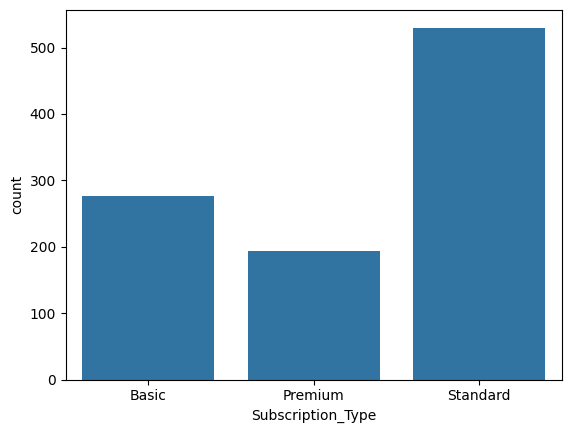

In [ ]:
sns.countplot(x='Subscription_Type', data=df)

In [ ]:
df.groupby('Subscription_Type')['Churned'].mean()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/754804819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Subscription_Type')['Churned'].mean()


Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64

<Axes: ylabel='Monthly_Hours_Watched'>

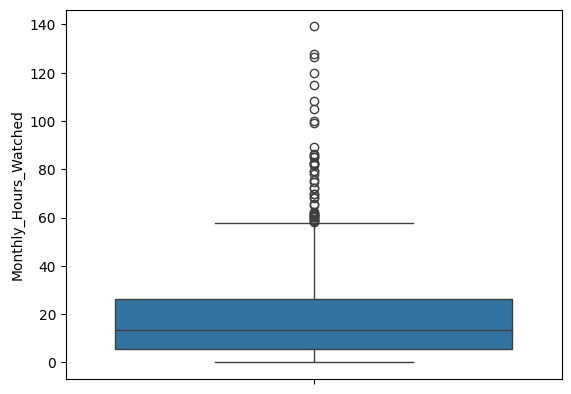

In [ ]:
sns.boxplot(df['Monthly_Hours_Watched'])

<Axes: xlabel='Gender', ylabel='Churned'>

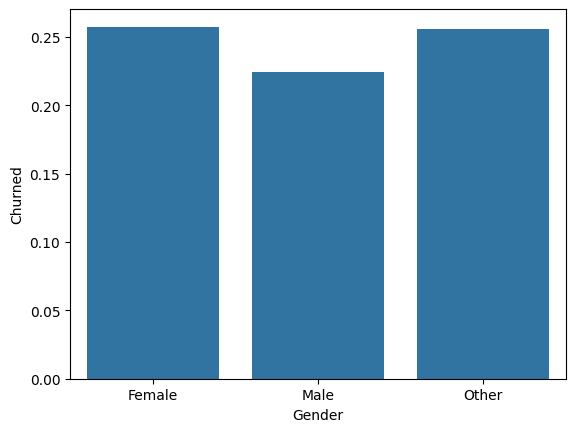

In [59]:
gender_churn_rate = df.groupby('Gender')['Churned'].mean().reset_index()
sns.barplot(x='Gender', y='Churned', data=gender_churn_rate)

In [ ]:
df.groupby('Gender')['Churned'].mean()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/1491268118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Churned'].mean()


Gender
Female    0.257576
Male      0.224551
Other     0.255952
Name: Churned, dtype: float64

<Axes: xlabel='Subscription_Type', ylabel='Churned'>

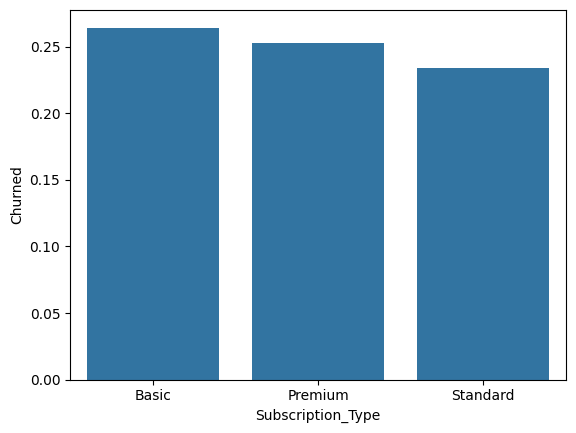

In [31]:
subchurn_rate = df.groupby('Subscription_Type')['Churned'].mean().reset_index()
sns.barplot(x='Subscription_Type', y='Churned', data=subchurn_rate)

<Axes: ylabel='Average_Session_Length'>

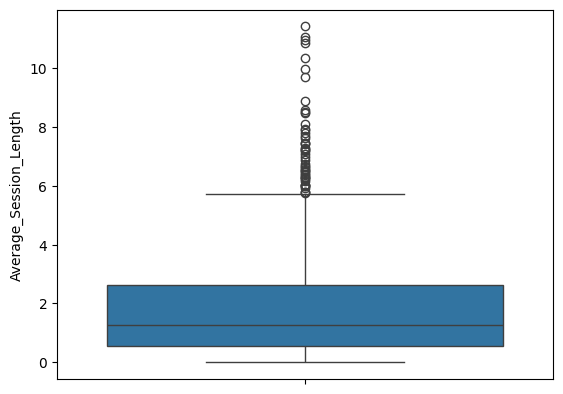

In [ ]:
sns.boxplot(df['Average_Session_Length'])

<Axes: xlabel='Favorite_Genre', ylabel='Churned'>

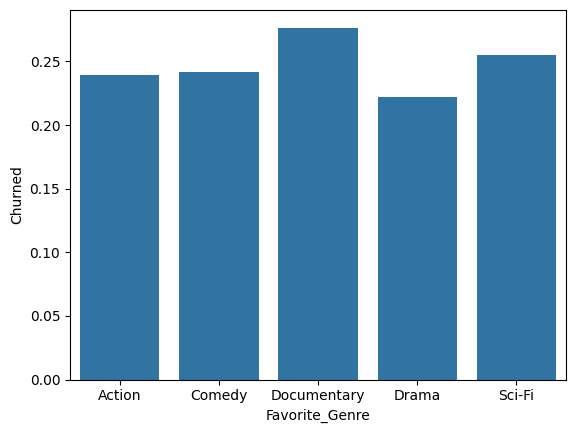

In [61]:
sns.countplot(x='Favorite_Genre', data=df)

<Axes: xlabel='Favorite_Genre', ylabel='Churned'>

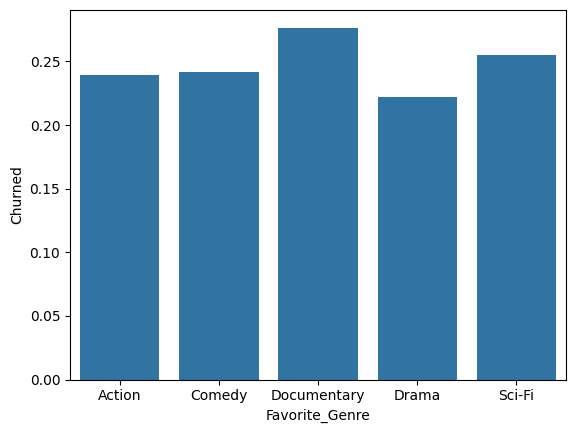

In [62]:
genre_churn_rate = df.groupby('Favorite_Genre')['Churned'].mean().reset_index()
sns.barplot(x='Favorite_Genre', y='Churned', data=genre_churn_rate)

<Axes: xlabel='Location', ylabel='Churned'>

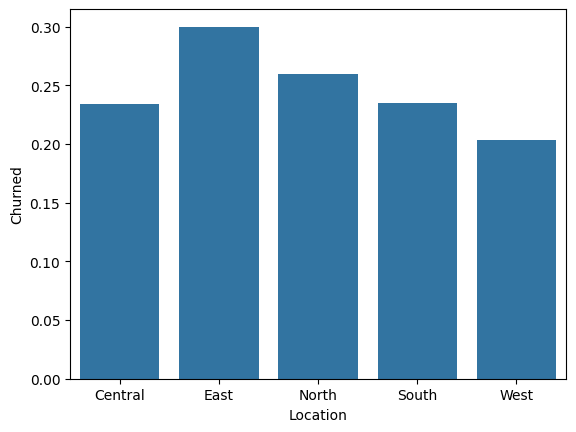

In [65]:
loc_churn_rate = df.groupby('Location')['Churned'].mean().reset_index()
sns.barplot(x='Location', y='Churned', data=loc_churn_rate)

<Axes: xlabel='Payment_Method', ylabel='count'>

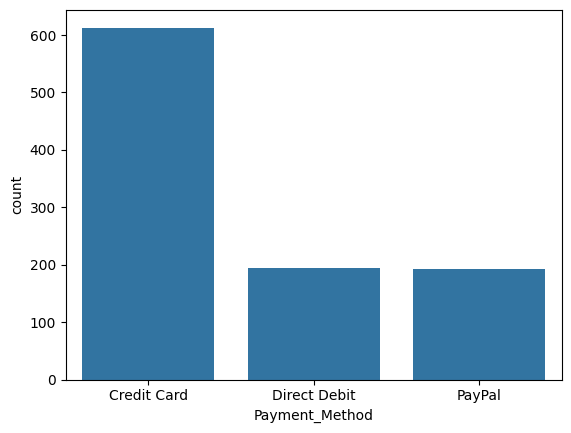

In [ ]:
sns.countplot(x='Payment_Method', data=df)

In [ ]:
churn_rate = df['Churned'].mean()

In [ ]:
retention_rate = 1 - churn_rate

In [ ]:
retention_rate

0.754

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/764031213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('Location')['Churned'].mean().reset_index()


<Axes: xlabel='Location', ylabel='Churned'>

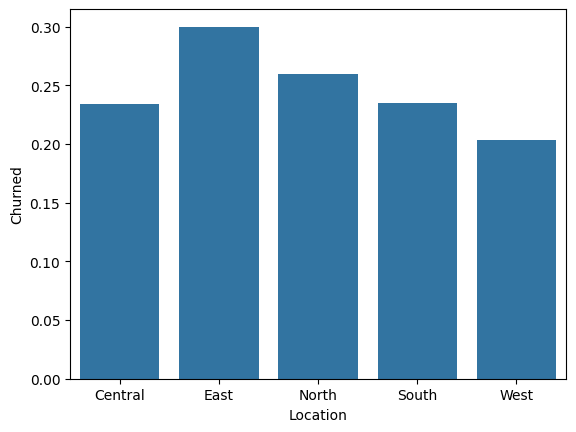

In [ ]:
churn_rate = df.groupby('Location')['Churned'].mean().reset_index()
sns.barplot(x='Location', y='Churned', data=churn_rate)

<Axes: xlabel='Gender', ylabel='Churned'>

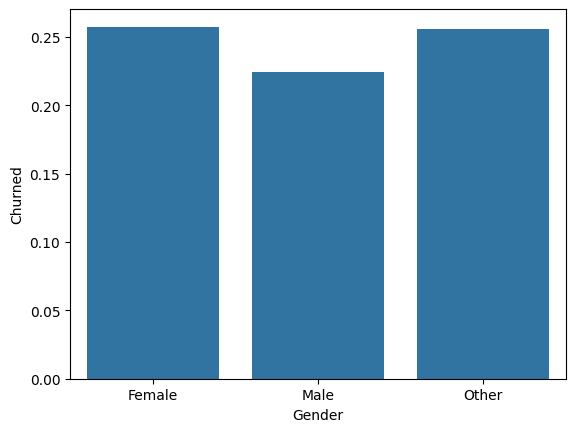

In [34]:
#Visualizing the churn rate for each gender
gender_churn_rate = df.groupby('Gender')['Churned'].mean().reset_index()
sns.barplot(x='Gender', y='Churned', data=gender_churn_rate)

In [ ]:
gender_churn_rate

,Gender,Churned
0,Female,0.257576
1,Male,0.224551
2,Other,0.255952


In [40]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Active_Months,CLV
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaN,NaN


In [41]:
total_users_by_location = df.groupby('Location')['User_ID'].count()
total_users_by_gender = df.groupby('Gender')['User_ID'].count()
total_users_by_subtyp = df.groupby('Subscription_Type')['User_ID'].count()
total_users_by_paymeth = df.groupby('Payment_Method')['User_ID'].count()
total_users_by_genre = df.groupby('Favorite_Genre')['User_ID'].count()
total_users_by_device = df.groupby('Devices_Used')['User_ID'].count()

In [45]:
churned_users_by_location = df[df['Churned'] == 1].groupby('Location')['User_ID'].count()
churned_users_by_gender = df[df['Churned'] == 1].groupby('Gender')['User_ID'].count()
churned_users_by_subtyp = df[df['Churned'] == 1].groupby('Subscription_Type')['User_ID'].count()
churned_users_by_paymeth = df[df['Churned'] == 1].groupby('Payment_Method')['User_ID'].count()
churned_users_by_genre = df[df['Churned'] == 1].groupby('Favorite_Genre')['User_ID'].count()
churned_users_by_device = df[df['Churned'] == 1].groupby('Devices_Used')['User_ID'].count()

Text(0.5, 1.0, 'Total Users and Churned Users per Location')

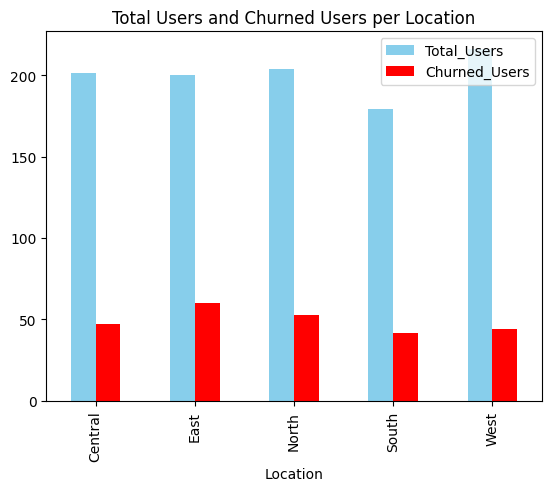

In [53]:
#Visualise the total users and churned users per location
# Combine the counts into a DataFrame
location_churn = pd.DataFrame({
    'Total_Users': total_users_by_location,
    'Churned_Users': churned_users_by_location,     
})

# Plot the DataFrame
location_churn.plot(kind='bar', stacked=False, color=['skyblue', 'red'])
plt.title('Total Users and Churned Users per Location')


Text(0.5, 1.0, 'Total Users and Churned Users per Gender')

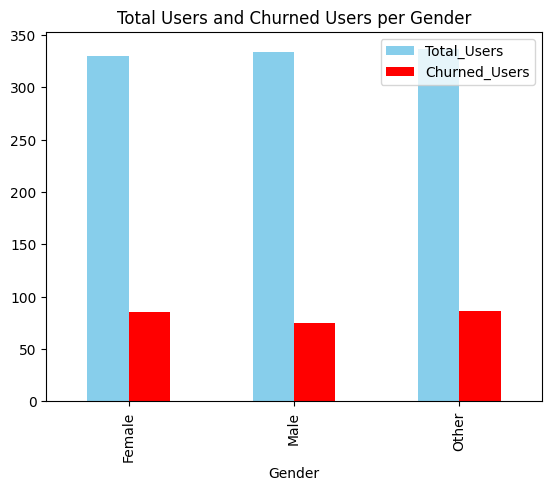

In [56]:
#Visualise the total and churned users by gender
gender_churn = pd.DataFrame({
    'Total_Users': total_users_by_gender,
    'Churned_Users': churned_users_by_gender     
})

gender_churn.plot(kind='bar', stacked=False, color=['skyblue', 'red'])
plt.title('Total Users and Churned Users per Gender')

Favorite_Genre
Action         205
Comedy         203
Documentary    188
Drama          212
Sci-Fi         192
Name: User_ID, dtype: int64

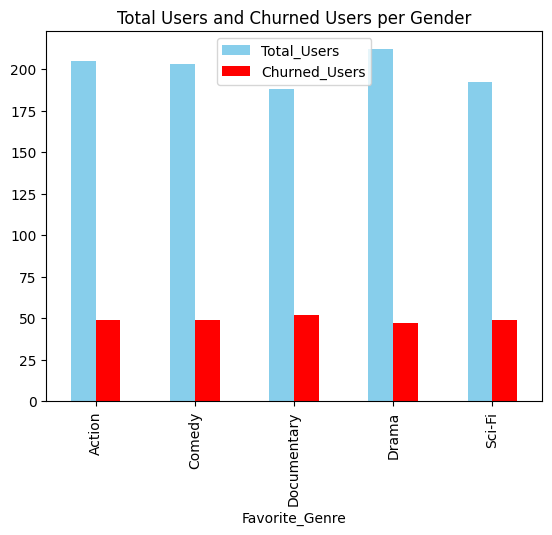

In [64]:
#Visualise the total and churned users by genre
genre_churn = pd.DataFrame({
    'Total_Users': total_users_by_genre,
    'Churned_Users': churned_users_by_genre     
})

genre_churn.plot(kind='bar', stacked=False, color=['skyblue', 'red'])
plt.title('Total Users and Churned Users per Gender')
total_users_by_genre

In [ ]:
#Visualise the total and churned users by gender
gender_churn = pd.DataFrame({
    'Total_Users': total_users_by_gender,
    'Churned_Users': churned_users_by_gender     
})

gender_churn.plot(kind='bar', stacked=False, color=['skyblue', 'red'])
plt.title('Total Users and Churned Users per Gender')

In [ ]:
#Visualise the total and churned users by gender
gender_churn = pd.DataFrame({
    'Total_Users': total_users_by_gender,
    'Churned_Users': churned_users_by_gender     
})

gender_churn.plot(kind='bar', stacked=False, color=['skyblue', 'red'])
plt.title('Total Users and Churned Users per Gender')

In [ ]:
#Check values for columns
df['Age'].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 70, 53, 57, 20, 39, 19,
       61, 47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35,
       21, 31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30,
       49, 63])

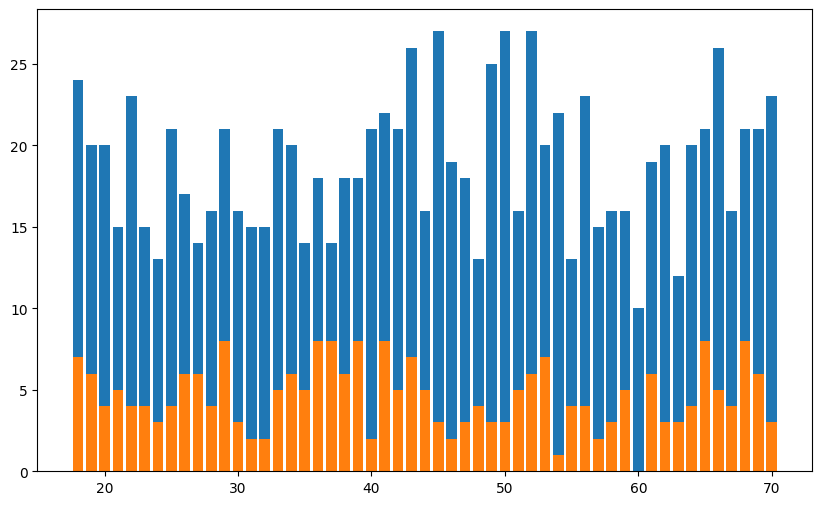

In [58]:
# Calculate total number of users and churned users by age
total_users_by_age = df.groupby('Age')['User_ID'].count()
churned_users_by_age = df.groupby('Age')['Churned'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
total_bar = ax.bar(total_users_by_age.index, total_users_by_age, label='Total Users')
churned_bar = ax.bar(churned_users_by_age.index, churned_users_by_age, label='Churned Users')
plt.show()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/4037430008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('Subscription_Type')['Churned'].mean().reset_index()


<Axes: xlabel='Subscription_Type', ylabel='Churned'>

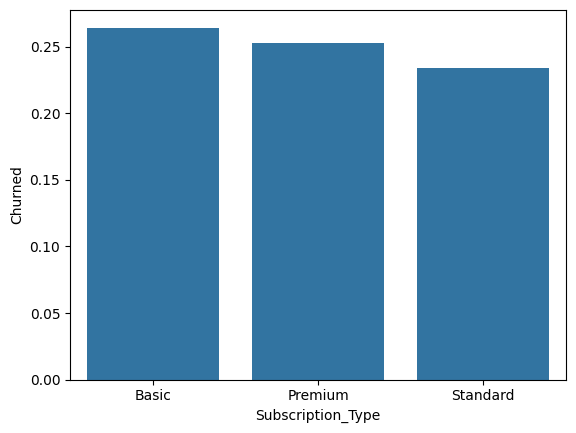

In [ ]:
churn_rate = df.groupby('Subscription_Type')['Churned'].mean().reset_index()
sns.barplot(x='Subscription_Type', y='Churned', data=churn_rate)

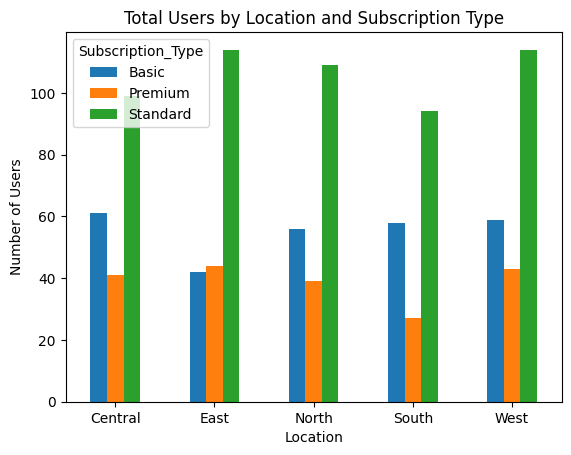

In [28]:
# Calculate total users by location and subscription type
total_users_by_location_subs = df.groupby(['Location', 'Subscription_Type'])['User_ID'].count().reset_index()

# Pivot the data for plotting
pivot_df = total_users_by_location_subs.pivot(index='Location', columns='Subscription_Type', values='User_ID').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=False)

plt.title('Total Users by Location and Subscription Type')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/114857365.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totalsubtyp = df.groupby(['Subscription_Type', 'Churned'])['User_ID'].count().reset_index()


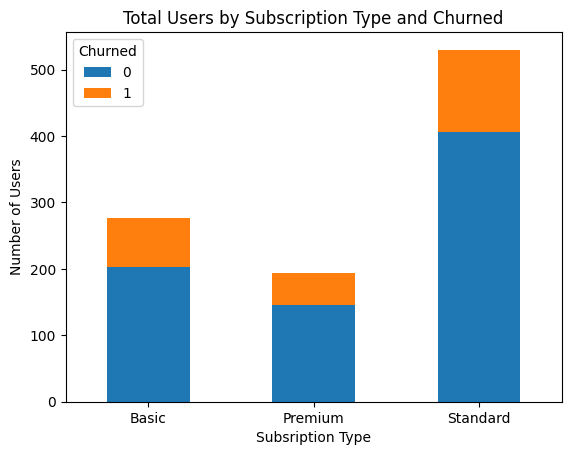

In [ ]:
# Calculate total users by location and subscription type
totalsubtyp = df.groupby(['Subscription_Type', 'Churned'])['User_ID'].count().reset_index()
pivot_df = totalsubtyp.pivot(index='Subscription_Type', columns='Churned', values='User_ID').fillna(0)
pivot_df.plot(kind='bar', stacked=True)

plt.title('Total Users by Subscription Type and Churned')
plt.xlabel('Subsription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/1918422242.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_users_by_location_subs = df.groupby(['Age', 'Gender'])['User_ID'].count().reset_index()


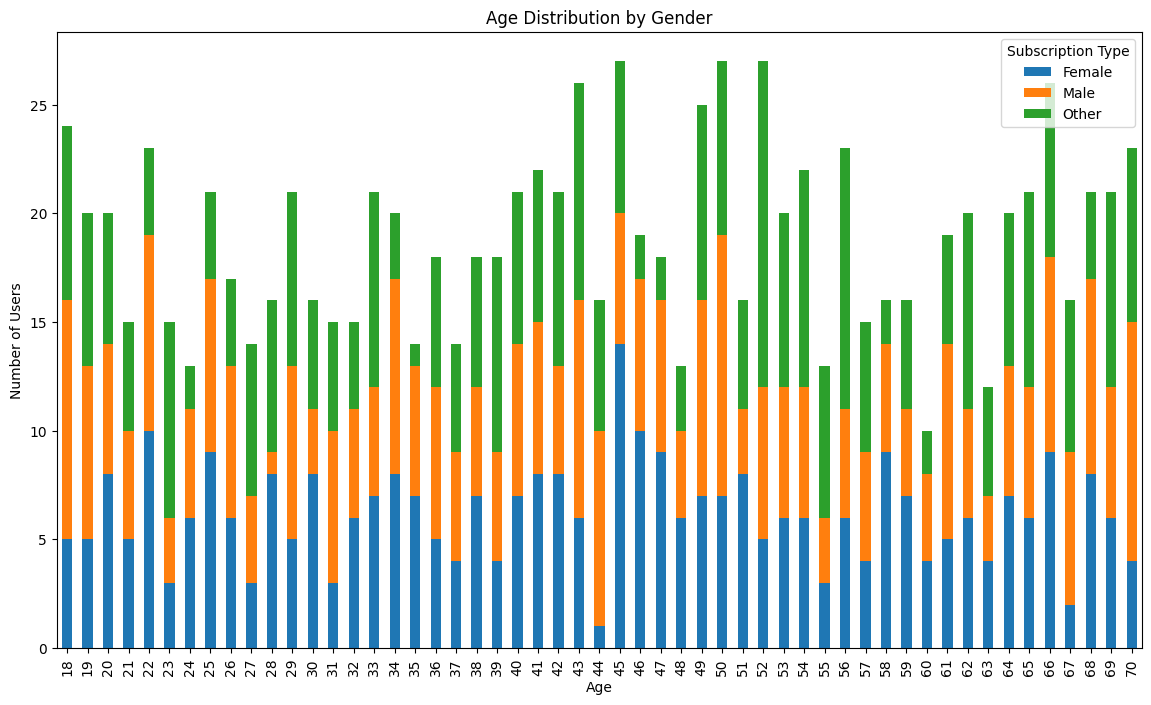

In [ ]:
# Calculate total users by location and subscription type
total_users_by_location_subs = df.groupby(['Age', 'Gender'])['User_ID'].count().reset_index()

# Pivot the data for plotting
pivot_df = total_users_by_location_subs.pivot(index='Age', columns='Gender', values='User_ID').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend(title='Subscription Type')
plt.show()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/1034602119.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_users_by_location_subs = df.groupby(['Devices_Used', 'Churned'])['User_ID'].count().reset_index()


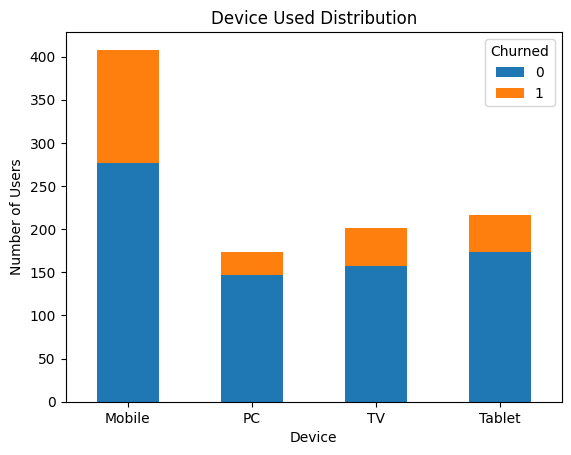

In [ ]:
# Calculate total users by location and subscription type
total_users_by_location_subs = df.groupby(['Devices_Used', 'Churned'])['User_ID'].count().reset_index()

# Pivot the data for plotting
pivot_df = total_users_by_location_subs.pivot(index='Devices_Used', columns='Churned', values='User_ID').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

plt.title('Device Used Distribution')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/2149513731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_users_by_location_subs = df.groupby(['Payment_Method', 'Churned'])['User_ID'].count().reset_index()


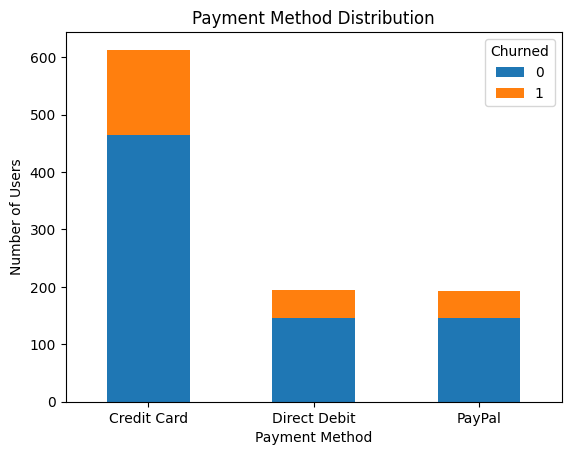

In [ ]:
# Calculate total users by location and subscription type
total_users_by_location_subs = df.groupby(['Payment_Method', 'Churned'])['User_ID'].count().reset_index()

# Pivot the data for plotting
pivot_df = total_users_by_location_subs.pivot(index='Payment_Method', columns='Churned', values='User_ID').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_53860/3013818728.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Location', 'Gender', 'Churned']).size().reset_index(name='User_Count')


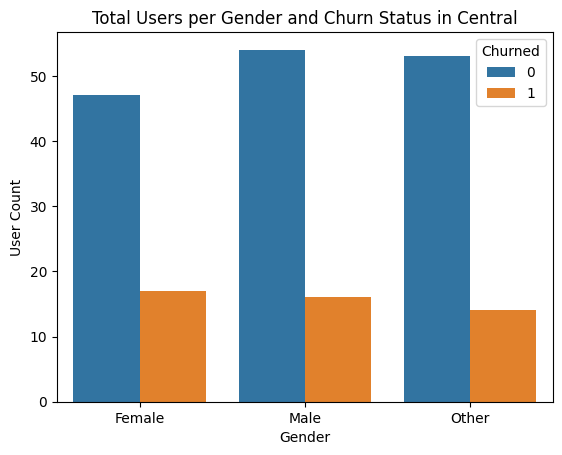

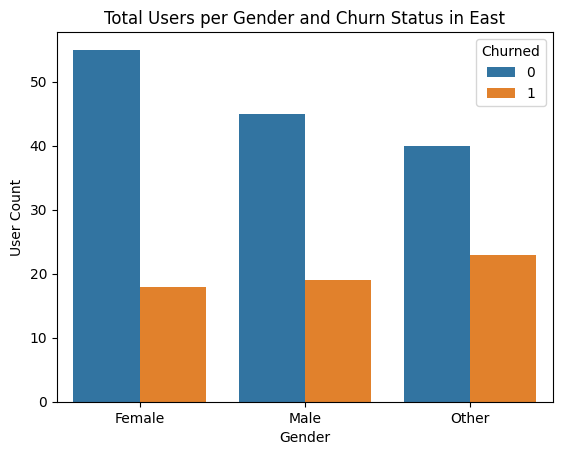

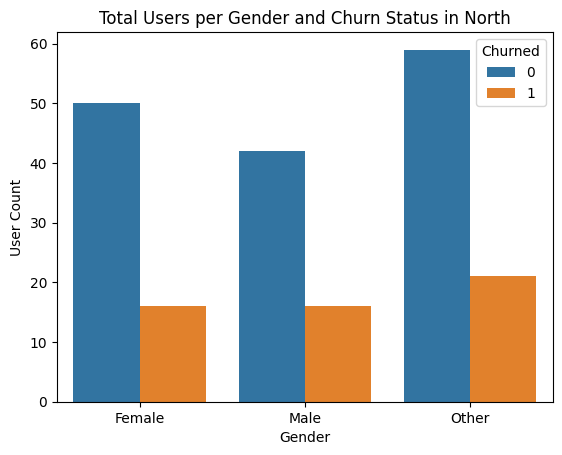

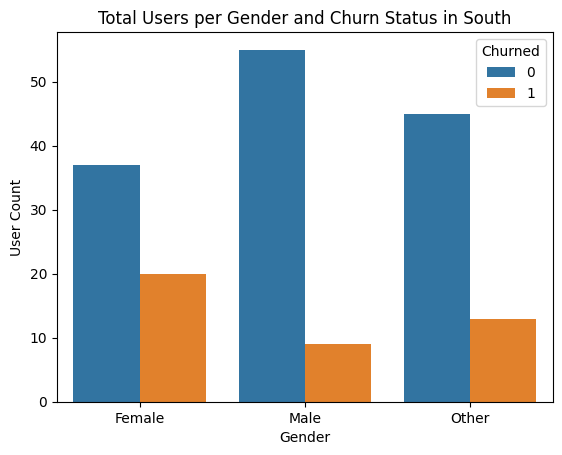

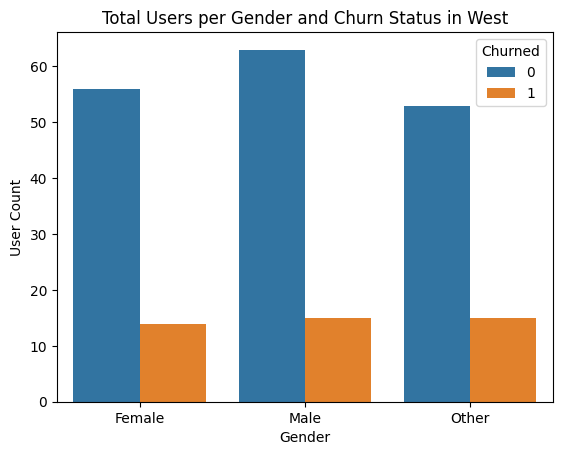

In [ ]:
grouped_data = df.groupby(['Location', 'Gender', 'Churned']).size().reset_index(name='User_Count')
def plot_location_data(location, location_data):
    sns.barplot(data=location_data, x='Gender', y='User_Count', hue='Churned')
    plt.title(f'Total Users per Gender and Churn Status in {location}')
    plt.xlabel('Gender')
    plt.ylabel('User Count')
    plt.legend(title='Churned', loc='upper right')
    plt.show()
locations = grouped_data['Location'].unique()

# Plot data for each location
for location in locations:
    location_data = grouped_data[grouped_data['Location'] == location]
    plot_location_data(location, location_data)

In [ ]:
grouped_data = df.groupby(['Favorite_Genre', 'Gender', 'Churned']).size().reset_index(name='User_Count')
def plot_location_data(location, location_data):
    sns.barplot(data=location_data, x='Gender', y='User_Count', hue='Churned')
    plt.title(f'Total Users per Gender and Churn Status in {location}')
    plt.xlabel('Gender')
    plt.ylabel('User Count')
    plt.legend(title='Churned', loc='upper right')
    plt.show()
locations = grouped_data['Location'].unique()

# Plot data for each location
for location in locations:
    location_data = grouped_data[grouped_data['Location'] == location]
    plot_location_data(location, location_data)

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_60081/1630164686.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  location_churn_rate = df.groupby('Location').apply(lambda x: x['Churned'].sum() / len(x)).reset_index(name='Churn_Rate')
/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_60081/1630164686.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_churn_rate = df.groupby('G

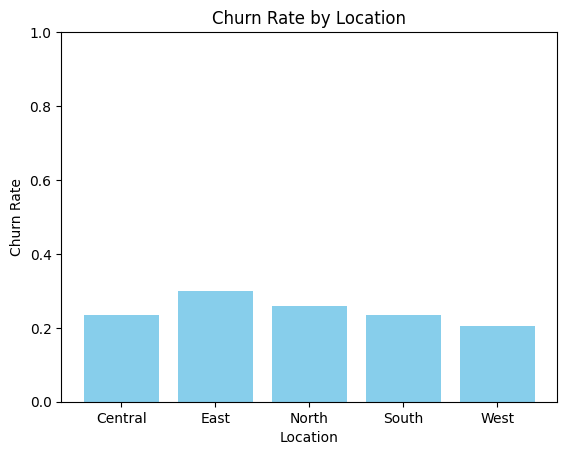

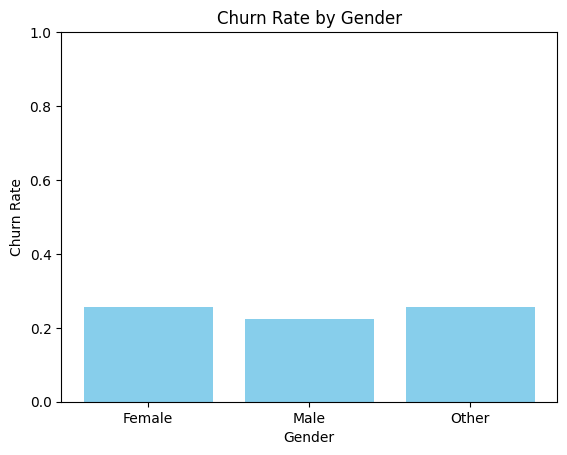

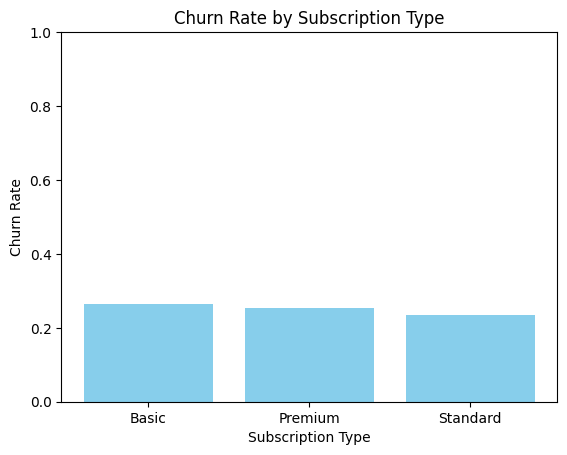

In [50]:
# Calculate churn rate for different locations
location_churn_rate = df.groupby('Location').apply(lambda x: x['Churned'].sum() / len(x)).reset_index(name='Churn_Rate')

# Calculate churn rate for different genders
gender_churn_rate = df.groupby('Gender').apply(lambda x: x['Churned'].sum() / len(x)).reset_index(name='Churn_Rate')

# Calculate churn rate for different subscription types
subscription_churn_rate = df.groupby('Subscription_Type').apply(lambda x: x['Churned'].sum() / len(x)).reset_index(name='Churn_Rate')

# Function to plot churn rates
def plot_churn_rate(churn_rate_df, title, xlabel):
    plt.bar(churn_rate_df.iloc[:, 0], churn_rate_df['Churn_Rate'], color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Churn Rate')
    plt.ylim(0, 1)
    plt.show()

# Plot churn rate by location
plot_churn_rate(location_churn_rate, 'Churn Rate by Location', 'Location')

# Plot churn rate by gender
plot_churn_rate(gender_churn_rate, 'Churn Rate by Gender', 'Gender')

# Plot churn rate by subscription type
plot_churn_rate(subscription_churn_rate, 'Churn Rate by Subscription Type', 'Subscription Type')

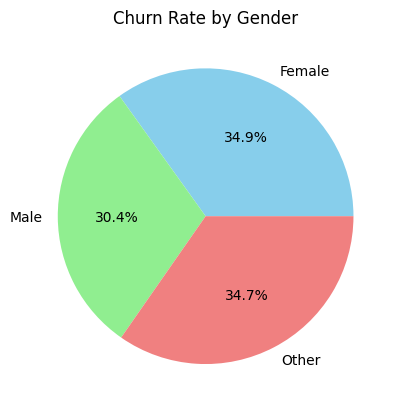

In [49]:
# Calculate the number of churned users by gender
gender_churn_counts = df[df['Churned'] == 1]['Gender'].value_counts()

# Calculate the total number of users by gender
gender_total_counts = df['Gender'].value_counts()

# Calculate the churn rate by gender
gender_churn_rate = (gender_churn_counts / gender_total_counts).fillna(0)

# Plot the churn rate by gender as a pie chart
plt.pie(gender_churn_rate, labels=gender_churn_rate.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Churn Rate by Gender')
plt.show()